# Feature Selection

### Filter method


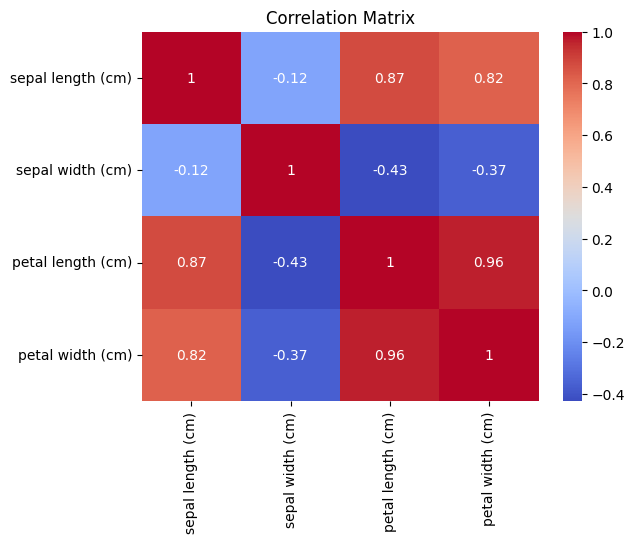

ANOVA F-test scores:
                   ANOVA Score
petal length (cm)  1180.161182
petal width (cm)    960.007147
sepal length (cm)   119.264502
sepal width (cm)     49.160040

Correlation with target:
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
dtype: float64


In [23]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest,f_classif,chi2
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


data=load_iris()
X=pd.DataFrame(data.data,columns=data.feature_names)
y=data.target


corr_matx=X.corr()
sns.heatmap(corr_matx, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


anova_selector=SelectKBest(score_func=f_classif,k='all')
anova_selector.fit(X,y)
anova_scores=pd.DataFrame(anova_selector.scores_,index=X.columns,columns=["ANOVA Score"])
print("ANOVA F-test scores:")
print(anova_scores.sort_values(by="ANOVA Score", ascending=False))



# X_discretized = pd.cut(X['sepal length (cm)'], bins=5)  # Example: discretizing 'sepal length'
# chi2_selector = SelectKBest(score_func=chi2, k='all')
# chi2_selector.fit(X_discretized.values.reshape(-1, 1), y)
# chi2_scores = pd.DataFrame(chi2_selector.scores_, index=["Discretized Sepal Length"], columns=["Chi2 Score"])
# print("\nChi-Square scores:")
# print(chi2_scores)


correlation_with_target=X.apply(lambda x:x.corr(pd.Series(y)))
print("\nCorrelation with target:")
print(correlation_with_target.sort_values(ascending=False))



### Wrapper Methods

In [24]:
#RFE

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

model=LogisticRegression(max_iter=200)

rfe=RFE(model,n_features_to_select=2)
rfe.fit(X,y)

print("Selected Features (RFE):")
print(X.columns[rfe.support_])
print("Ranking of features:")
print(dict(zip(X.columns, rfe.ranking_)))

Selected Features (RFE):
Index(['petal length (cm)', 'petal width (cm)'], dtype='object')
Ranking of features:
{'sepal length (cm)': np.int64(3), 'sepal width (cm)': np.int64(2), 'petal length (cm)': np.int64(1), 'petal width (cm)': np.int64(1)}


### Embedded methods

In [ ]:
#L1 regularization

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

data=load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)


lasso=Lasso(alpha=0.1)
lasso.fit(X_scaled,y)

coef=pd.Series(lasso.coef_,index=X.columns)
print("🔎 Lasso Coefficients:")
print(coef)

print("\n✅ Selected Features (non-zero):")
print(coef[coef != 0].index.tolist())
   

🔎 Lasso Coefficients:
sepal length (cm)    0.000000
sepal width (cm)    -0.000000
petal length (cm)    0.263330
petal width (cm)     0.427466
dtype: float64

✅ Selected Features (non-zero):
['petal length (cm)', 'petal width (cm)']


In [ ]:
#Tree Based Models
from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest
rf = RandomForestClassifier()
rf.fit(X, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
print("🌳 Random Forest Feature Importances:")
print(importances.sort_values(ascending=False))

print("\n✅ Selected Features (importance > 0.15):")
print(importances[importances > 0.15].index.tolist())


In [ ]:
# # Elastic net 
# from sklearn.linear_model import ElasticNet

# # Fit ElasticNet on binary
# enet = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio = mix level
# enet.fit(X_bin, y_bin)

# enet_coef = pd.Series(enet.coef_, index=X.columns)
# print("🧬 ElasticNet Coefficients:")
# print(enet_coef)

# print("\n✅ Selected Features (non-zero):")
# print(enet_coef[enet_coef != 0].index.tolist())


In [ ]:
## Linear Model Coefficients (with regularization)

# from sklearn.linear_model import LogisticRegression

# # Binary again
# logreg = LogisticRegression(penalty='l2', solver='liblinear')
# logreg.fit(X_bin, y_bin)

# log_coef = pd.Series(logreg.coef_[0], index=X.columns)
# print("📈 Logistic Regression Coefficients:")
# print(log_coef)

# print("\n✅ Selected Features (abs coef > 0.5):")
# print(log_coef[log_coef.abs() > 0.5].index.tolist())

### PCA

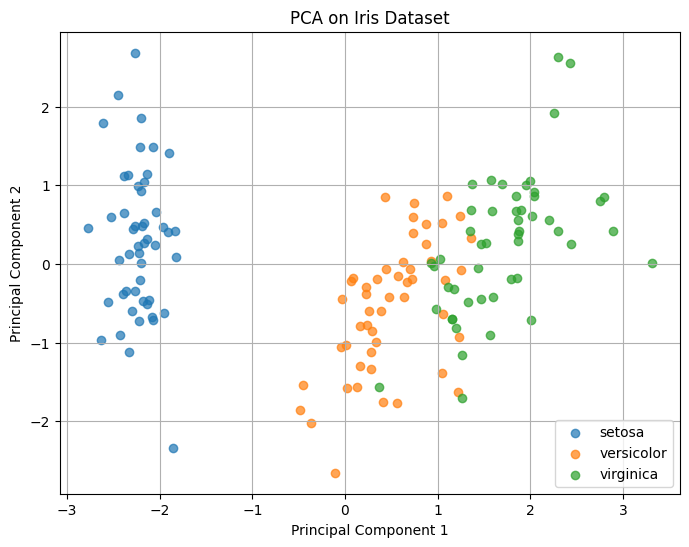

Explained variance ratio: [0.72962445 0.22850762]


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels
feature_names = iris.feature_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)


plt.figure(figsize=(8, 6))
for label, color in zip([0,1,2],['r','g','b']):
     plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=iris.target_names[label], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()


print("Explained variance ratio:", pca.explained_variance_ratio_)